Why MSE is wrong for Logistic Regression

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [63]:
np.random.seed(42)
x = np.linspace(-5,5,100)
y = (x>0).astype(int)

x = x.reshape(-1,1)

In [64]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

def mse_loss(y,p):
  return np.mean((y-p)**2)

In [65]:
def log_loss(y,p):
  esp = 1e-9
  p = np.clip(p,esp,1-esp)
  return -np.mean(y*np.log(p)+(1-y)*np.log(1-p))

In [66]:
def train(loss_type , lr=0.1 , epochs=1000):
  w,b = 0,0
  losses = []

  for _ in range(epochs):
    z = x @ np.array([w]) + b
    p = sigmoid(z).flatten()

    if loss_type == 'mse':
      loss = mse_loss(y,p)
      grad = (p-y)*p*(1-p)

    else:
      loss = log_loss(y,p)
      grad = (p-y)

    dw = np.mean(grad*x.flatten())
    db = np.mean(grad)

    w -= lr*dw
    b -= lr*db

    losses.append(loss)

  return w , b , losses

In [67]:
w_mse , b_mse , losses_mse = train('mse')
w_logloss , b_logloss , losses_logloss = train('logloss')

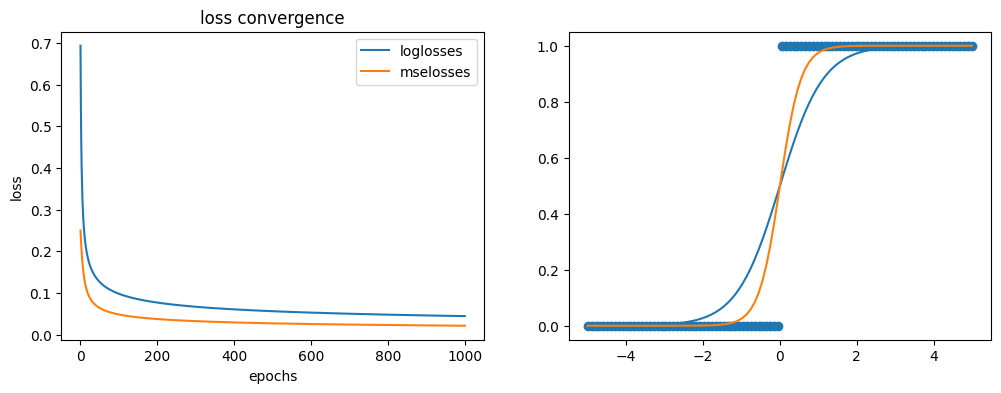

In [68]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(losses_logloss,label='loglosses')
plt.plot(losses_mse,label = 'mselosses')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('loss convergence')
plt.legend()

plt.subplot(1,2,2)
plt.scatter(x,y)
plt.plot(x , sigmoid(x @ np.array([w_mse]) + b_mse) , label='mse')
plt.plot(x , sigmoid(x @ np.array([w_logloss]) + b_logloss) , label='logloss')
plt.show()

In [78]:
w_vals = np.linspace(-5,5,100)
b_vals = np.linspace(-5,5,100)

w,b = np.meshgrid(w_vals , b_vals)

mse_surface = np.zeros_like(w)
logloss_surface = np.zeros_like(w)

for i in range(w.shape[0]):
  for j in range(w.shape[1]):
    z = w[i,j] * x + b[i,j]
    p = sigmoid(z)

    mse_surface[i,j] = mse_loss(y,p)
    logloss_surface[i,j] = log_loss(y,p)


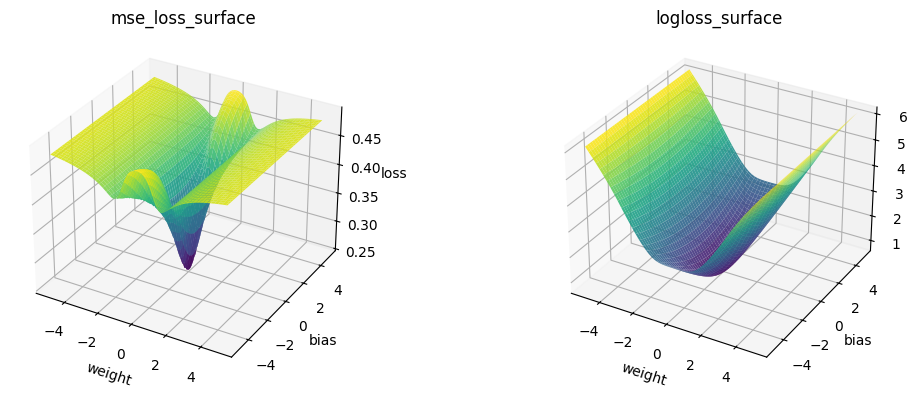

In [79]:
fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(121,projection="3d")
ax1.plot_surface(w,b,mse_surface,cmap='viridis',alpha = 0.9 )
ax1.set_title("mse_loss_surface")
ax1.set_xlabel("weight")
ax1.set_ylabel("bias")
ax1.set_zlabel("loss")

ax1 = fig.add_subplot(122,projection="3d")
ax1.plot_surface(w,b,logloss_surface,cmap='viridis',alpha = 0.9 )
ax1.set_title("logloss_surface")
ax1.set_xlabel("weight")
ax1.set_ylabel("bias")
ax1.set_zlabel("loss")

plt.tight_layout()
plt.show()

Mounted at /content/drive
